In [1]:
!pip install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # holiscit model -> make detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities -> draw them

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image) # Make prediction
    image.flags.writeable = True
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
# image와 result는 mediapipe_detection함수에서 나오는 return값들이다. 
def draw_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [6]:
def draw_styled_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=10, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=10, circle_radius=1)
                             )
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=2)
                             )
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,110,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()


        # Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        
        cv2.imshow('OpenCV Feed', image)

        # break gracefully ==> &는 bitwise연산 --> 빠름 아마 cv2.wiatKey의 반환값이 16진법 2자리인 듯. 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [9]:
results.face_landmarks

landmark {
  x: 0.5255082845687866
  y: 0.6193801164627075
  z: -0.010956249199807644
}
landmark {
  x: 0.5272446870803833
  y: 0.5864395499229431
  z: -0.04105626046657562
}
landmark {
  x: 0.5263892412185669
  y: 0.5910890102386475
  z: -0.01763203926384449
}
landmark {
  x: 0.5203643441200256
  y: 0.5358579158782959
  z: -0.037742603570222855
}
landmark {
  x: 0.5276595950126648
  y: 0.5742623209953308
  z: -0.0457041896879673
}
landmark {
  x: 0.5279881358146667
  y: 0.5538979768753052
  z: -0.04520499333739281
}
landmark {
  x: 0.5286383032798767
  y: 0.4982927143573761
  z: -0.03166932612657547
}
landmark {
  x: 0.46626558899879456
  y: 0.4790091812610626
  z: -0.002745233243331313
}
landmark {
  x: 0.5293566584587097
  y: 0.45574140548706055
  z: -0.03118770942091942
}
landmark {
  x: 0.529805600643158
  y: 0.43681079149246216
  z: -0.035842884331941605
}
landmark {
  x: 0.5313646793365479
  y: 0.3720032274723053
  z: -0.03997448459267616
}
landmark {
  x: 0.5253145694732666
  y

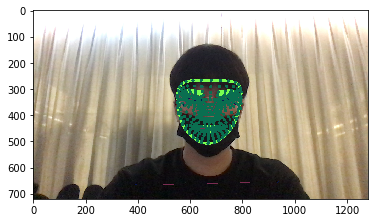

In [10]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

$$3.Extract Keypoint Values$$

In [11]:
results.pose_landmarks.landmark[0]
# x,y,z, visibility로 이루어져 있음

x: 0.5286967754364014
y: 0.5558029413223267
z: -1.1138298511505127
visibility: 0.999555766582489

In [12]:
#flatten작업
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
# 아래의 컴프리헨션과 동일한 코드

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() 
lh = np.array([[i.x, i.y, i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[i.x, i.y, i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[i.x, i.y, i.z] for i in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [14]:
def extract_keypoints(results):
    pose = pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() 
    lh = np.array([[i.x, i.y, i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[i.x, i.y, i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[i.x, i.y, i.z] for i in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face, lh,rh])

In [15]:
# face 468 * 3, lh,rh = 21 *3, pose 33*4
result_test = extract_keypoints(results)

In [16]:
# np.save('파일이름', np.array) ==> npy형식으로 저장됨
np.save('0', result_test)

In [17]:
# 방금 저장한 npy 에서 배열 불러오기 
tempo = np.load('0.npy')

In [18]:
print(tempo.shape)

(1662,)


## 4.Setup Folders for collections ##

In [19]:
# path for exported data, np arrays
DATA_PATH = os.path.join('MP_Data')
print(os.path)
# actions that we try to detect
actions = np.array(['hello','thanku','Iloveyou'])
print(actions.shape)
# 30 videos wort of data - 영상 30개 
no_sequences = 30
# Videos are going to be 30 frames in length - 한 영상 당 30frame 
sequence_length = 30

<module 'posixpath' from '/opt/anaconda3/lib/python3.7/posixpath.py'>
(3,)


In [20]:
#hello -> 0,1,2,3,.....29 와 같이 폴더 구성
# thanks
# I love you 도 마찬가지

In [21]:
# path에다 action 별 폴더 생성
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint values for training and testing#

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #New Loop
    #Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                
                # Read feed
                ret, frame = cap.read()


                # Make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                
                # Apply collections logic
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for "# {} #" Video Number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for "# {} #" Video Nmber {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                
                

                # break gracefully ==> &는 bitwise연산 --> 빠름 아마 cv2.wiatKey의 반환값이 16진법 2자리인 듯. 
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


AttributeError: 'NoneType' object has no attribute 'landmark'

In [23]:
cap.release()
cv2.destroyAllWindows()

# 6.Preprocess Data and Create Labels and Features#

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
# enumerate와 dict, 컴프리헨션이 모두 사용된 고급 문장....
label_map = {label:num for num, label in enumerate(actions)}

In [26]:
label_map

{'hello': 0, 'thanku': 1, 'Iloveyou': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    # sequence는 30개의 영상 중 몇 번쨰인지 영상 번호!
    for sequence in range(no_sequences):
        # window에는 30개 프레임, 즉 영상 하나가 "연속적"으로 담긴다
        window = []
        # frame_num은 영상 내 30개의 frame중 몇 번째 frame인지를 나타냄 
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        # sequences에 영상 0번부터 29번까지 모두 담긴다 
        sequences.append(window)
        # 위에서 label_map에 인사와 번호를 짝지어놨기 때문에 해당 번호 ( 0,1,2 중 하나)를 labels에 추가한다. 
        labels.append(label_map[action])
        

In [28]:
# 90개의 영상, 각 영상 당 30개의 frame, 한 frame에 1662개의 keypoints
np.array(sequences).shape


(90, 30, 1662)

In [29]:
x = np.array(sequences)

In [30]:
x.shape

(90, 30, 1662)

In [31]:
#정답을 갖고있는 list를 해당 index에 정답이 1, 나머지는 0이 되도록 해주는 to_categorical
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [33]:
y.shape

(90, 3)

In [34]:
# 임의로 , train과 test 데이터를 나누어 저장 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.05)

In [35]:
x_train.shape

(85, 30, 1662)

In [41]:
y_train.shape

(85, 3)

In [36]:
x_test.shape

(5, 30, 1662)

In [37]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM NN#

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
# Sequential로 모델 만듦. ==> 단순히 layer를 add하여 사용하면 되므로 간편, 깔끔 하다. 
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [46]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [227]:
model.fit(x_train, y_train, epochs=1000, callbacks=[tb_callback], )

Epoch 1/1000
3/3 [==============================] - 2s 245ms/step - loss: 10.7445 - categorical_accuracy: 0.4247
Epoch 2/1000
3/3 [==============================] - 0s 58ms/step - loss: 5.1461 - categorical_accuracy: 0.3619
Epoch 3/1000
3/3 [==============================] - 0s 58ms/step - loss: 9.8089 - categorical_accuracy: 0.3698
Epoch 4/1000
3/3 [==============================] - 0s 58ms/step - loss: 2.0972 - categorical_accuracy: 0.3834
Epoch 5/1000
3/3 [==============================] - 0s 58ms/step - loss: 1.8284 - categorical_accuracy: 0.3073
Epoch 6/1000
3/3 [==============================] - 0s 57ms/step - loss: 2.4797 - categorical_accuracy: 0.4911
Epoch 7/1000
3/3 [==============================] - 0s 61ms/step - loss: 3.3983 - categorical_accuracy: 0.2917
Epoch 8/1000
3/3 [==============================] - 0s 59ms/step - loss: 2.1094 - categorical_accuracy: 0.5049
Epoch 9/1000
3/3 [==============================] - 0s 59ms/step - loss: 3.4145 - categorical_accuracy: 0.4539

3/3 [==============================] - 0s 51ms/step - loss: 1.0985 - categorical_accuracy: 0.3464
Epoch 146/1000
3/3 [==============================] - 0s 56ms/step - loss: 1.0989 - categorical_accuracy: 0.3386
Epoch 147/1000
3/3 [==============================] - 0s 56ms/step - loss: 1.1013 - categorical_accuracy: 0.2917
Epoch 148/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.0984 - categorical_accuracy: 0.3425
Epoch 149/1000
3/3 [==============================] - 0s 60ms/step - loss: 1.1006 - categorical_accuracy: 0.3112
Epoch 150/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.0992 - categorical_accuracy: 0.3425
Epoch 151/1000
3/3 [==============================] - 0s 60ms/step - loss: 1.0986 - categorical_accuracy: 0.3581
Epoch 152/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.0993 - categorical_accuracy: 0.3425
Epoch 153/1000
3/3 [==============================] - 0s 72ms/step - loss: 1.0982 - categorical_accuracy: 0.358

3/3 [==============================] - 0s 54ms/step - loss: 1.0980 - categorical_accuracy: 0.3386
Epoch 290/1000
3/3 [==============================] - 0s 53ms/step - loss: 1.0994 - categorical_accuracy: 0.3229
Epoch 291/1000
3/3 [==============================] - 0s 53ms/step - loss: 1.0946 - categorical_accuracy: 0.3698
Epoch 292/1000
3/3 [==============================] - 0s 53ms/step - loss: 1.0943 - categorical_accuracy: 0.3581
Epoch 293/1000
3/3 [==============================] - 0s 52ms/step - loss: 1.0957 - categorical_accuracy: 0.3464
Epoch 294/1000
3/3 [==============================] - 0s 53ms/step - loss: 1.0971 - categorical_accuracy: 0.3659
Epoch 295/1000
3/3 [==============================] - 0s 52ms/step - loss: 1.0976 - categorical_accuracy: 0.3698
Epoch 296/1000
3/3 [==============================] - 0s 52ms/step - loss: 1.0944 - categorical_accuracy: 0.3815
Epoch 297/1000
3/3 [==============================] - 0s 52ms/step - loss: 1.0969 - categorical_accuracy: 0.342

3/3 [==============================] - 0s 57ms/step - loss: 1.0950 - categorical_accuracy: 0.3405
Epoch 434/1000
3/3 [==============================] - 0s 56ms/step - loss: 1.0960 - categorical_accuracy: 0.3444
Epoch 435/1000
3/3 [==============================] - 0s 52ms/step - loss: 1.0951 - categorical_accuracy: 0.3796
Epoch 436/1000
3/3 [==============================] - 0s 55ms/step - loss: 1.0968 - categorical_accuracy: 0.3679
Epoch 437/1000
3/3 [==============================] - 0s 53ms/step - loss: 1.0989 - categorical_accuracy: 0.3249
Epoch 438/1000
3/3 [==============================] - 0s 55ms/step - loss: 1.0940 - categorical_accuracy: 0.3796
Epoch 439/1000
3/3 [==============================] - 0s 61ms/step - loss: 1.1013 - categorical_accuracy: 0.3288
Epoch 440/1000
3/3 [==============================] - 0s 61ms/step - loss: 1.0952 - categorical_accuracy: 0.3601
Epoch 441/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.0956 - categorical_accuracy: 0.344

KeyboardInterrupt: 

# 8. Make Prediction 

In [1]:
res = model.predict(x_test)

NameError: name 'model' is not defined

In [229]:
np.argmax(res[0])

0

In [231]:
print(res)

[[0.35049918 0.30804205 0.34145874]
 [0.35049918 0.30804205 0.34145874]
 [0.35049918 0.30804205 0.34145874]
 [0.35049918 0.30804205 0.34145874]
 [0.35049918 0.30804205 0.34145874]]


In [230]:
actions[np.argmax([res[0]])]

'hello'

# 9.Save weights

In [64]:
model.save('action.h5')

In [38]:
del model

In [47]:
model.load_weights('action.h5')

# 10. Evaluation using confusion Matrix and Accuracy

In [233]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [234]:
ytrue = np.argmax(y_train, axis = 1).tolist()
yhat = model.predict(X_train)
yhat = np.argmax(yhat, axis=1).tolist()

In [235]:
x_test.shape

(5, 30, 1662)

In [236]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [237]:
type(ytrue)

list

In [238]:
ytrue

[0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0]

In [239]:
yhat

[0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0]

In [240]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[35, 20],
        [17, 13]],

       [[31, 28],
        [10, 16]],

       [[53,  3],
        [24,  5]]])

In [241]:
accuracy_score(ytrue,yhat)

0.4

# 11. Test in Real Time

In [251]:
# New detection variables
sequence = []
sentence=["None"]
threshold=0.7


cap = cv2.VideoCapture(0)
# Set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()


        # Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        #print(keypoints.shape) ==> (1662,)
        #keypoints = keypoints.reshape()
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            # sequence는 list에 (1662,) vector가 들어가있는 형태였다.  즉 3개가 들어가있으면, len(sequence) = 3
            print(np.expand_dims(sequence,axis=0).shape,"***")
            res = model.predict(np.expand_dims(sequence, axis=0))
            print(res.shape)
            print(res)
            print(np.argmax(res))
            
        
        
   ##     print(res)
     #   print(res.shape)
      #  print(np.argmax(res))
       # print(res[np.argmax(res)])
        
            if res[0,np.argmax(res)] > threshold:
                #print(np.argmax(res))
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]
        
        cv2.rectangle(image, (0,0), (640,40), (245,180,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3, cv2.LINE_AA)
                    
        cv2.imshow('OpenCV Feed', image)

        # break gracefully ==> &는 bitwise연산 --> 빠름 아마 cv2.wiatKey의 반환값이 16진법 2자리인 듯. 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.6286814e-01 1.7255108e-04 8.3695930e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.4564918e-02 1.5526584e-04 9.5527977e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.8246464e-02 1.8467754e-04 9.7156882e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.4748221e-02 2.1297250e-04 9.7503883e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.4748176e-02 2.2105595e-04 9.7503078e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.7238350e-02 2.3404867e-04 9.7252762e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.2299593e-02 2.6941288e-04 9.6743101e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.9167

(1, 3)
[[4.1545743e-05 9.9973112e-01 2.2725613e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.4647441e-05 9.9973351e-01 2.2179038e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.2971911e-05 9.9973506e-01 2.2193589e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.5001911e-05 9.9972981e-01 2.2509605e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.387990e-05 9.997259e-01 2.301957e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.4914861e-05 9.9971718e-01 2.3786897e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.2204490e-05 9.9971753e-01 2.4026087e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.3181877e-05 9.9971884e-01 2.3803684e-04]]
1
<class 'mediapipe.python.solution_base

<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.5010854  0.0005132  0.49840137]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.0464851e-01 4.9910101e-04 4.9485242e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.1177502e-01 4.8529307e-04 4.8773965e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.2099043e-01 4.7140580e-04 4.7853816e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.2528125e-01 4.6390377e-04 4.7425482e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.3002495e-01 4.5882061e-04 4.6951628e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.3968763e-01 4.5276908e-04 4.5985952e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.4741406e-01 4

<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.1401953e-01 4.1322583e-05 8.5939191e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.0145940e-01 4.3044725e-05 9.8497458e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.96995902e-01 4.29179927e-05 1.02961175e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.0184367e-01 4.1480627e-05 9.8114848e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.1209334e-01 3.9767820e-05 8.7866910e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.3480361e-01 4.2016723e-05 6.5154351e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.4193274e-01 4.1932875e-05 5.8025409e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.4

(1, 3)
[[9.3025243e-01 1.3482246e-04 6.9612712e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.3212295e-01 1.2586101e-04 6.7751139e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.3271095e-01 1.1763615e-04 6.7171469e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.3029284e-01 1.1111255e-04 6.9595993e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.2627555e-01 1.0569039e-04 7.3618814e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.2048633e-01 9.9928315e-05 7.9413734e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.1533405e-01 9.2748742e-05 8.4573217e-02]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.1050130e-01 8.5389496e-05 8.9413233e-02]]
0
<class 'mediapipe.python.solution_b

(1, 3)
[[8.0873186e-05 9.9824691e-01 1.6721443e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.9284397e-05 9.9860734e-01 1.3234501e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.7413646e-05 9.9904853e-01 8.8401709e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[7.056407e-05 9.993222e-01 6.073314e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.4582117e-05 9.9951494e-01 4.3050078e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.1897543e-05 9.9965656e-01 3.0153862e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.4099223e-05 9.9969471e-01 2.7124700e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.0067946e-05 9.9965227e-01 3.1768638e-04]]
1
<class 'mediapipe.python.solution_base

(1, 3)
[[1.05470885e-04 9.98432696e-01 1.46186107e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.1490774e-04 9.9843019e-01 1.4548923e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.3521827e-04 9.9829680e-01 1.5680807e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.7345219e-04 9.9802339e-01 1.8031962e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.4262801e-04 9.9751991e-01 2.2375027e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.5460957e-04 9.9670815e-01 2.9371753e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.4310536e-04 9.9523288e-01 4.2239609e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.7244931e-04 9.9229336e-01 6.8342397e-03]]
1
<class 'mediapipe.python.solutio

(1, 3)
[[7.4738330e-01 3.2717519e-04 2.5228956e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[7.8475428e-01 3.2034903e-04 2.1492539e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.1956416e-01 3.0762318e-04 1.8012820e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.4531802e-01 2.9610397e-04 1.5438595e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.6708772e-01 2.8935657e-04 1.3262299e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.8116992e-01 2.8638908e-04 1.1854371e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.93671751e-01 2.75512139e-04 1.06052764e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.0150791e-01 2.6584315e-04 9.8226145e-02]]
0
<class 'mediapipe.python.solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.9991332e-01 9.9094061e-05 2.9998758e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[7.3535252e-01 9.9226156e-05 2.6454827e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[7.6377445e-01 1.0235764e-04 2.3612322e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[7.9354495e-01 1.0685240e-04 2.0634814e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.2577330e-01 1.0550545e-04 1.7412123e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.4960282e-01 1.0761659e-04 1.5028945e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.6102575e-01 1.1663828e-04 1.3885762e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[8.7347

(1, 3)
[[1.5461833e-04 9.9916446e-01 6.8099832e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.2478925e-04 9.9911600e-01 7.5920782e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.4490054e-04 9.9908221e-01 7.7286473e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.2332133e-04 9.9907434e-01 8.0242468e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.3780512e-04 9.9905187e-01 8.1035716e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.3065967e-04 9.9904245e-01 8.2685531e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.0805283e-04 9.9900913e-01 8.8287226e-04]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.6154311e-04 9.9875379e-01 9.8464417e-04]]
1
<class 'mediapipe.python.solution_b

(1, 30, 1662) ***
(1, 3)
[[5.8404392e-01 2.1385369e-04 4.1574222e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.8967787e-01 2.0756124e-04 4.1011459e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.9626222e-01 2.0532677e-04 4.0353239e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.0874707e-01 2.0088394e-04 3.9105198e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.2231445e-01 1.9248611e-04 3.7749311e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.3536966e-01 1.9003759e-04 3.6444026e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.5109068e-01 1.8470972e-04 3.4872463e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.7023009e-01 1.7636028e-04 3.2959354e-01]]
0
<class 'mediapipe

(1, 30, 1662) ***
(1, 3)
[[7.28574157e-01 1.11796064e-04 2.71314114e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[7.0766407e-01 1.1390264e-04 2.9222208e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.8698460e-01 1.1478643e-04 3.1290060e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.7039281e-01 1.1526025e-04 3.2949194e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.5705097e-01 1.1647089e-04 3.4283251e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.4287144e-01 1.1714510e-04 3.5701141e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.2631607e-01 1.1796035e-04 3.7356594e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.1069810e-01 1.1852303e-04 3.8918343e-01]]
0
<class 'mediap

(1, 3)
[[6.7852277e-01 1.4319818e-04 3.2133406e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.8318331e-01 1.3513555e-04 3.1668153e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.8546295e-01 1.2964799e-04 3.1440741e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.7692822e-01 1.2765103e-04 3.2294413e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.6403908e-01 1.2732507e-04 3.3583364e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.4896226e-01 1.2695306e-04 3.5091084e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.3407743e-01 1.2465313e-04 3.6579791e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.2066537e-01 1.2067983e-04 3.7921396e-01]]
0
<class 'mediapipe.python.solution_b

(1, 3)
[[1.1067908e-04 9.9857485e-01 1.3144732e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.20482706e-04 9.98531103e-01 1.34836091e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.4978957e-04 9.9828500e-01 1.5651593e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[1.8962500e-04 9.9791855e-01 1.8918609e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[2.6385428e-04 9.9729484e-01 2.4413064e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.8306820e-04 9.9639744e-01 3.2195295e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.9214531e-04 9.9491405e-01 4.4936929e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.00101862 0.99164635 0.00733502]]
1
<class 'mediapipe.python.solution_base.So

<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.6215919e-01 1.7202001e-04 5.3766876e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.6987933e-01 1.7951430e-04 5.2994114e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.8126277e-01 1.8543513e-04 5.1855177e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.9254504e-01 1.8935154e-04 5.0726557e-01]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.0016516e-01 1.9538307e-04 4.9963942e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.0693792e-01 2.0087944e-04 4.9286118e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.1264977e-01 2.0674725e-04 4.8714349e-01]]
0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[5.1076

(1, 30, 1662) ***
(1, 3)
[[0.00948155 0.6726468  0.31787166]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.00561222 0.8482882  0.1460997 ]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.00218683 0.9413159  0.05649725]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[9.2437805e-04 9.7547048e-01 2.3605159e-02]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[6.71268732e-04 9.84924376e-01 1.44043965e-02]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[4.6072828e-04 9.9104428e-01 8.4949220e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.858855e-04 9.934140e-01 6.200089e-03]]
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[3.3653012e-04 9.9496341e-01 4.7001499e-03]]
1
<class 'mediapipe.python.solution_base.Solut

(1, 3)
[[0.23498791 0.00590546 0.75910664]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.23244774 0.00537039 0.7621819 ]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.23108315 0.00471885 0.76419795]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.23157722 0.00418303 0.7642397 ]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.2328369 0.0037319 0.7634312]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.23627596 0.00345384 0.76027024]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.24220201 0.00334021 0.7544578 ]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.24931487 0.00330952 0.7473756 ]]
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
(1, 30, 1662) ***
(1, 3)
[[0.25939655 0.00338371 0.73

In [248]:
res[0,np.argmax(res)]

0.9999982

In [249]:
cap.release()
cv2.destroyAllWindows()